person


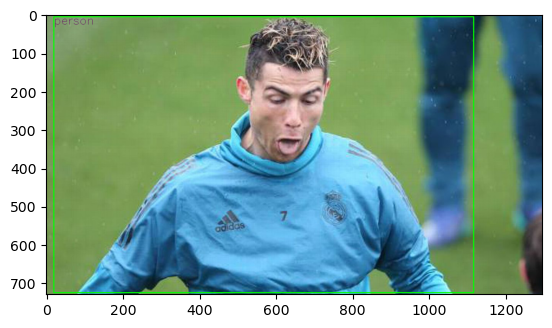

In [2]:
import cv2
import matplotlib.pyplot as plt

model = cv2.dnn.readNetFromTensorflow('../xmltxt/frozen_inference_graph.pb', '../xmltxt/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

f = open('../xmltxt/object_detection_classes_coco.txt')
cls = f.read().split('\n')

img = cv2.imread('../imgs/r1.jpg')
h, w, _ = img.shape

model.setInput(cv2.dnn.blobFromImage(img, size=(300, 300)))
out = model.forward()

for i in out[0, 0]:
    score = i[2]
    if score > 0.8:
        idd = int(i[1]) - 1
        name = cls[idd]
        x = int(i[3] * w)
        y = int(i[4] * h)
        x2 = int(i[5] * w)
        y2 = int(i[6] * h)
        cv2.rectangle(img, (x, y), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, name, (x, y+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 100), 1)

plt.imshow(img[..., ::-1])
print(name)

In [4]:
import cv2

model = cv2.dnn.readNetFromTensorflow('../xmltxt/frozen_inference_graph.pb','../xmltxt/ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

f = open('../xmltxt/object_detection_classes_coco.txt')
cls = f.read().split('\n')

cap = cv2.VideoCapture(1)   
while True:
    ret, frame = cap.read()
    if not ret:
        break
    h, w, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, size=(300, 300), swapRB=True)
    model.setInput(blob)
    out = model.forward()

    for i in out[0, 0]:
        score = i[2]
        if score > 0.8:
            idd = int(i[1]) - 1
            name = cls[idd]

            x = int(i[3] * w)
            y = int(i[4] * h)
            x2 = int(i[5] * w)
            y2 = int(i[6] * h)

            cv2.rectangle(frame, (x, y), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, name, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8,(0, 0, 255), 2)

    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()